In [1]:
import numpy as np
import tensorflow as tf
import skimage as ski
import skimage.data, skimage.transform
from inception.slim import slim

#FLAGS = tf.app.flags.FLAGS
#tf.app.flags.DEFINE_string('eval_dir', '/tmp/imagenet_eval',
#                           """Directory where to write event logs.""")
#tf.app.flags.DEFINE_string('save_dir', '/home/kivan/source/results/semseg/tf/nets/19_3_0:22:12/',
#                           """Directory where to read model checkpoints.""")

-


def evaluate(inputs):
    
  """Eval CIFAR-10 for a number of steps."""
  with tf.Graph().as_default():
    data = tf.placeholder(tf.float32, shape=(batch_size, height, width, channels))

    # Build a Graph that computes the logits predictions from the
    # inference model.
    logits = cifar10.inference(images)

    # Calculate predictions.
    top_k_op = tf.nn.in_top_k(logits, labels, 1)

    # Restore the moving average version of the learned variables for eval.
    variable_averages = tf.train.ExponentialMovingAverage(
        cifar10.MOVING_AVERAGE_DECAY)
    variables_to_restore = variable_averages.variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)

    # Build the summary operation based on the TF collection of Summaries.
    summary_op = tf.merge_all_summaries()

    graph_def = tf.get_default_graph().as_graph_def(add_shapes=True)
    summary_writer = tf.train.SummaryWriter(FLAGS.eval_dir,
                                            graph_def=graph_def)

    while True:
      eval_once(saver, summary_writer, top_k_op, summary_op)
      if FLAGS.run_once:
        break
      time.sleep(FLAGS.eval_interval_secs)
    
def forward_pass(sess, img):   
  #with tf.Session() as sess:
    # Restore the moving average version of the learned variables for eval.
    #variable_averages = tf.train.ExponentialMovingAverage(cifar10.MOVING_AVERAGE_DECAY)
    #variables_to_restore = variable_averages.variables_to_restore()
    #saver = tf.train.Saver(variables_to_restore)
    #output = sess.run(logits, feed_dict = {data: batch, indices: batch_y})
  
  return output

In [2]:
import models.vgg_16s as model

batch_size = 1
height = 512
width = 1024
channels = 3
num_classes = 19
#net_dir = '/home/kivan/source/results/semseg/tf/nets/19_3_20:58:50/'
net_dir = '/home/kivan/source/results/semseg/tf/nets/19_3_0:22:12/'
sess = tf.Session()
#with tf.Graph().as_default():
data = tf.placeholder(tf.float32, shape=(1, height, width, channels))
# Build a Graph that computes the logits predictions from the inference model.
ckpt = tf.train.get_checkpoint_state(net_dir)
if ckpt and ckpt.model_checkpoint_path:
  # Restores from checkpoint
  #with tf.Session() as sess:
  logits = model.inference(data)
  saver = tf.train.Saver()
  print(ckpt.model_checkpoint_path)
  saver.restore(sess, ckpt.model_checkpoint_path)
  # Assuming model_checkpoint_path looks something like:
  #   /my-favorite-path/cifar10_train/model.ckpt-0,
  # extract global_step from it.
  global_step = ckpt.model_checkpoint_path.split('/')[-1].split('-')[-1]
else:
  print('No checkpoint file found')
  raise 'error'

/home/kivan/source/results/semseg/tf/nets/19_3_0:22:12/model.ckpt-7000


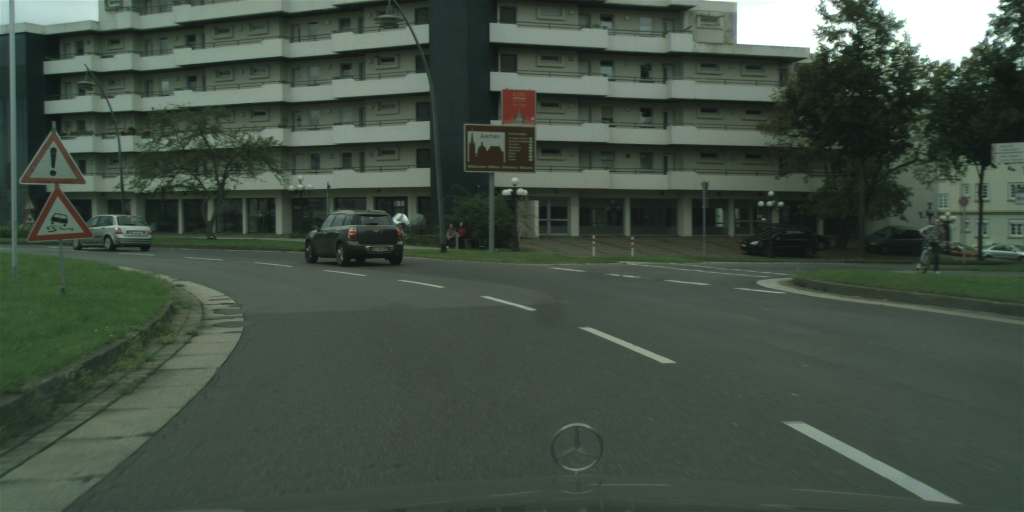

(1, 32, 64, 19)
(32, 64, 3)


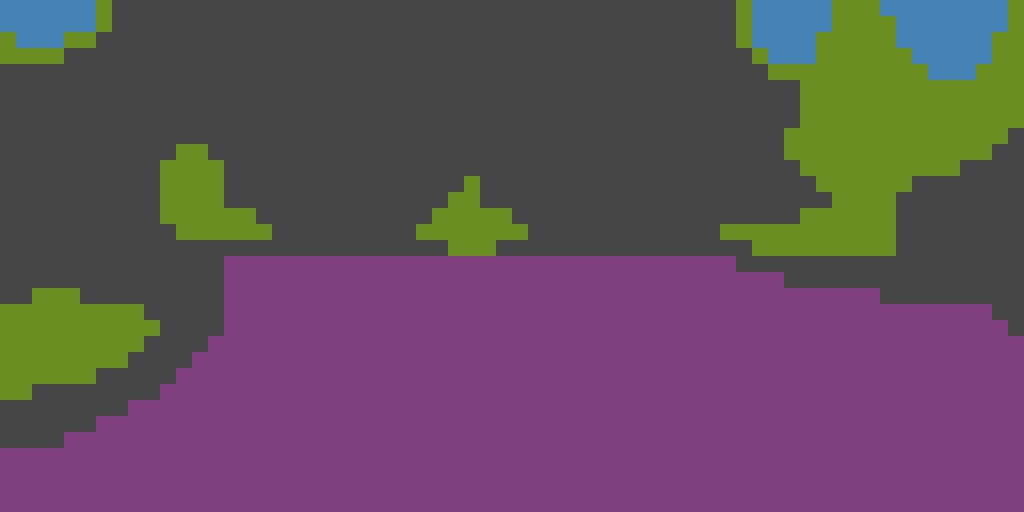

In [3]:
from IPython.display import Image, display
from matplotlib import pyplot as plt

from io import BytesIO
import PIL
from IPython.display import display, Image

def display_nparray(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

def draw_prediction(y, colors):
  width = y.shape[1]
  height = y.shape[0]
  col = np.zeros(3)
  yimg = np.empty((height, width, 3), dtype=np.uint8)
  for i in range(height):
    for j in range(width):
      cid = y[i,j]
      for k in range(3):
        yimg[i,j,k] = colors[cid][k]
      #img[i,j,:] = col
  print(yimg.shape)
  yimg = ski.transform.resize(yimg, (height*16, width*16), order=0, preserve_range=True).astype(np.uint8)
  display_nparray(yimg)


rgb_img = ski.data.load('/home/kivan/datasets/Cityscapes/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png')
num_examples = batch_size * height * width
rgb_img = ski.transform.resize(rgb_img, (height, width), order=3, preserve_range=True)
img = (rgb_img - rgb_img.mean()) / rgb_img.std()
batch = img.reshape(1, height, width, 3)
display_nparray(rgb_img.astype(np.uint8))
out = sess.run(logits, feed_dict = {data: batch})
print(out.shape)
pred = out[0].argmax(2)

from datasets.cityscapes.cityscapes_info import *
draw_prediction(pred, class_info)

In [9]:
tf.reset_default_graph()

In [12]:
from notebook.auth import passwd
passwd()

Enter password: ········
Verify password: ········


'sha1:b47400f306de:c6930b8ca5dfe328a43623b60cb6f098efc9f3ef'